Author: Jay Meshram

Data Science and Business Analytics Intern at The Sparks Foundation

Task 1 - Students Performance Prediction using Linear Regression

Problem Statement - 1) Predict the percentage of an student based on the number of study hours.

                    2) What will be predicted score if a student studies for 9.25 hrs/ day?

# Data Load

In [1]:
#library 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("student_scores - student_scores.csv")

In [3]:
#view Top 5 Row and Columns:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#shape of data
data.shape

(25, 2)

# Data Preparation

In [5]:
#find the number of columns :

data.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
#information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
#Null data  identifies

data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
#describe for statistical
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000182F6D2D888>,
      dtype=object)

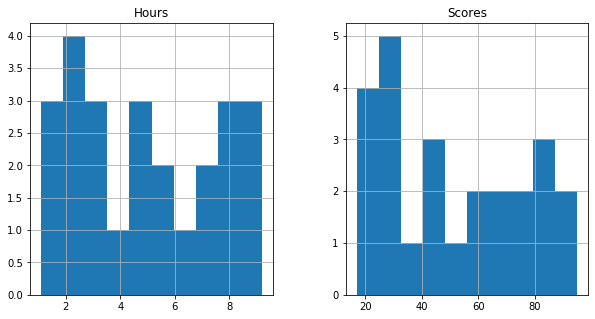

In [9]:
data.hist(figsize=(10,5))

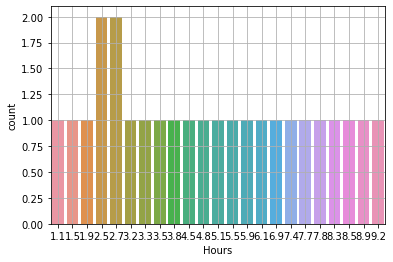

In [10]:
#count plot of Hours study
plt=sns.countplot(x='Hours', data=data)
plt.grid(True)

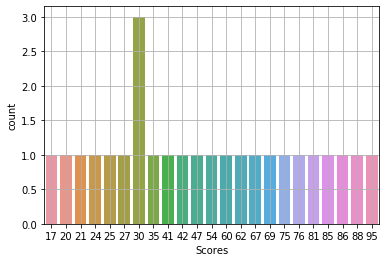

In [11]:
#count plot scores
plt=sns.countplot(x='Scores', data=data)
plt.grid(True)

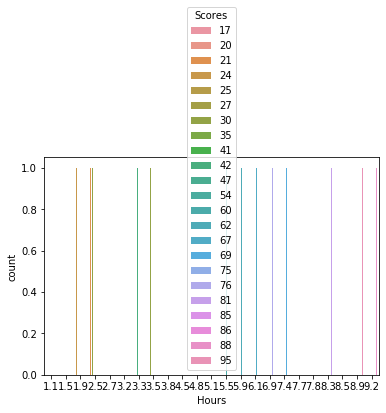

In [12]:
#countplot Hours and Scores
sns.countplot(x='Hours',hue='Scores', data=data)

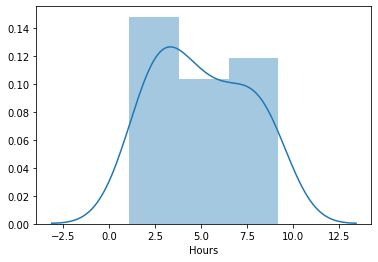

In [13]:

sns.distplot(data['Hours'], kde="False")

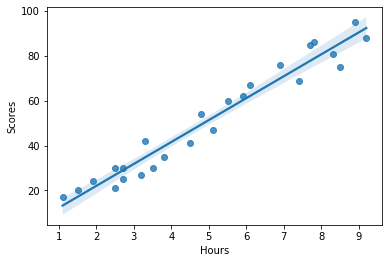

In [14]:
sns.regplot(x='Hours', y='Scores', data=data)

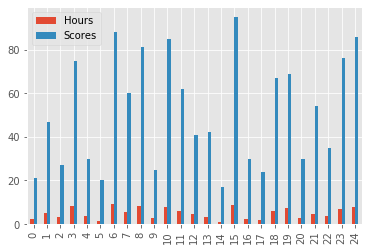

In [15]:
import matplotlib
matplotlib.style.use('ggplot')
data.plot.bar()

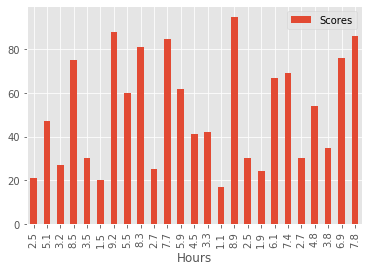

In [16]:
data.plot.bar(x='Hours',y='Scores')

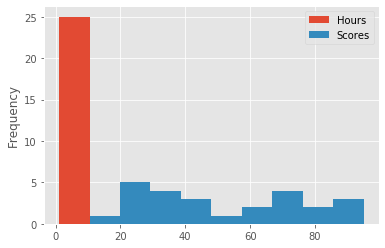

In [17]:
data.plot.hist()

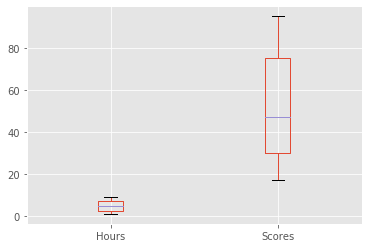

In [18]:
data.plot.box()

In [19]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [20]:
#if student is study in 9 hrs to check scores
df2=data.loc[data['Hours']>9]
df2

,Hours,Scores
6,9.2,88


In [21]:
#sorting the Scores
df2=data.sort_values(by=['Scores'], ascending=False)
df2

,Hours,Scores
15,8.9,95
6,9.2,88
24,7.8,86
10,7.7,85
8,8.3,81
23,6.9,76
3,8.5,75
19,7.4,69
18,6.1,67
11,5.9,62


In [22]:
#apply function used here 
df2=data['Hours'].mean()
df3=data.apply('mean')
print("seperated mean of on Hours:",df2)
print("All the columns Hours:",df3)

seperated mean of on Hours: 5.012
All the columns Hours: Hours      5.012
Scores    51.480
dtype: float64


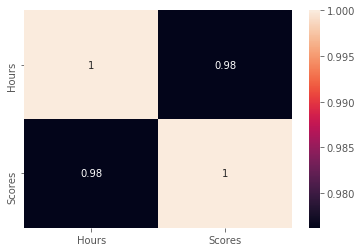

In [23]:
sns.heatmap(data.corr(), annot=True)

In [24]:
#independent and dependent variable


X =data.iloc[:, :-1].values
y =data.iloc[:, 1].values

# Data Modeling

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [26]:
# splitting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,)

In [27]:
#initilaizes the model
reg = LinearRegression()    
#fit the model on traing set
reg.fit(X_train, y_train)     

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Prediction

In [28]:
print(X_test)
y_pred = reg.predict(X_test)   #Predicting the scores
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [29]:
# comparing actual versus predicted 

comparing = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
comparing

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Que:- What will be predicted score if a student studies for 9.25 hrs/ day?

In [30]:
hour=np.array([9.25])
prediction = reg.predict(hour.reshape(-1,1))
print("No of Hours = {}\n".format(hour))
print("Predicted Score = {}\n".format(prediction))

No of Hours = [9.25]

Predicted Score = [93.69173249]



Text(0, 0.5, 'Scores In Exam')

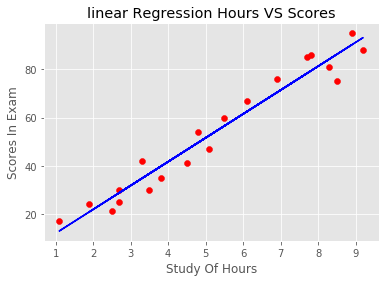

In [31]:
#visulization of training
import matplotlib.pyplot as plt
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,reg.predict(X_train),color='blue')
plt.title("linear Regression Hours VS Scores")
plt.xlabel("Study Of Hours")
plt.ylabel("Scores In Exam")


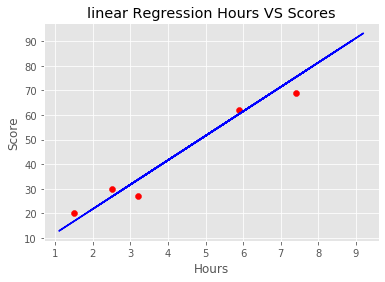

In [32]:
#visulization of testing

plt.scatter(X_test,y_test, color='red')
plt.plot(X_train,reg.predict(X_train), color='blue')#straight line
plt.title("linear Regression Hours VS Scores")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.show()

In [33]:
from sklearn import metrics

In [34]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

print('Mean Squared Error:',
      metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Absolute Error:',
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Absolute Error: 4.6474476121003665


In [35]:
#checking the Accuracy of Model
reg.score(X,y)

0.9526947647057274